In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
import os
sys.path.append('../python/')

#set up matplotlib
os.environ['MPLCONFIGDIR'] = '../mplstyles'
print(os.environ['MPLCONFIGDIR'])
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')
print(mpl.__version__) 
print(mpl.get_configdir())


#fonts
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'32'}
legend_font = {'fontname':'Arial', 'size':'22'}

#fonts global settings
mpl.rc('font',family=legend_font['fontname'])


#set up numpy
import numpy as np

../mplstyles
3.0.3
/home/phys/villaa/analysis/misc/nrFano_Constraint/mplstyles


# Using New Calculations to Determine $\sigma_Q$

In the note `QEr_2D_joint.ipynb` we found the two-dimensional Q-$\tilde{E}_r$ distribution that we expect, given a certain Edelweiss detector resolution from their 2004 paper [REF]. Here, we compare the Edw. expectation for the yield (Q) width to what one would expect given those two-dimensional distributions. We also compare to data generated in our "physically correct" style (see `ms_correction.ipynb`). 



In [2]:
#get the resolutions for GGA3
import EdwRes as er

aH=0.0386
V=4.0
C=0.0
sigHv,sigIv,sigQerv,sigH_NRv,sigI_NRv,sigQnrv = er.getEdw_det_res('GGA3',V,'data/edw_res_data.txt',aH,C)

In [3]:
#make an electron-recoil data set
import observable_simulations as osim
Qer,Erer = osim.simQEr_ER('GGA3',V=V,aH=aH,C=C,F=0.0,HighER=300)

print(Erer)

[ 42.13382559 257.12956515 285.30097241 ...  71.47496254 241.27545679
 101.99284251]


In [4]:
#get statistics given a certain binning
import histogram_yield as hy
#bins = [0,20,40,60,80,100,120,140,160,180,200]
bins = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
bins = np.asarray(bins)
xE = (bins[:-1] + bins[1:]) / 2

bindf,bindfE = hy.QEr_Ebin(Qer, Erer, bins=bins,silent=True)
qbootsigs,qbootsigerrsl,qbootsigerrsu = hy.QEr_Qboot(bindf,bins,silent=True)
qbootcorrs = hy.QEr_QbootBC(bindfE,qbootsigs,xE,20,bins,silent=True)

print(qbootsigs)
print(qbootsigerrsl)
print(qbootsigerrsu)
print(qbootcorrs)

[9.16307662e+01 1.49144787e-01 9.25137088e-02 7.24345308e-02
 6.22642272e-02 5.67561426e-02 5.31902869e-02 5.08722791e-02
 4.94599077e-02 4.83639088e-02 4.73906957e-02 4.68251523e-02
 4.60946510e-02 4.56172524e-02 4.55901538e-02 4.51776578e-02
 4.51805090e-02 4.47422011e-02 4.45949375e-02 4.45528483e-02]
[6.22129897e+01 7.33067231e-04 4.10864205e-04 3.10266778e-04
 2.74045717e-04 2.40556813e-04 2.39076913e-04 2.23703740e-04
 2.22183131e-04 2.13412703e-04 2.14410970e-04 2.11996582e-04
 2.08800224e-04 2.05617464e-04 2.05811061e-04 1.98910187e-04
 2.00515499e-04 2.01768567e-04 2.00408472e-04 1.98025187e-04]
[7.28572654e+01 7.09038390e-04 4.08897230e-04 3.18745206e-04
 2.80143205e-04 2.51185759e-04 2.36463394e-04 2.22185642e-04
 2.23471845e-04 2.15609848e-04 2.12647175e-04 2.12403040e-04
 2.04818279e-04 2.05035679e-04 2.07027023e-04 2.04198725e-04
 2.00298916e-04 2.01524388e-04 1.96021373e-04 2.01050150e-04]
[5.68879284e+02 2.99733444e-01 9.90953208e-01 9.96178530e-01
 9.97616286e-01 9.980

In [5]:
import h5py
#save the results for the simulated data
path='{}/'.format('ER')

filename = 'data/sims.h5'


#remove vars
f = h5py.File(filename,'a')
exbins = path+'bins' in f
exxE = path+'xE' in f
exQ = path+'Q' in f
exEr = path+'Er' in f
exqbootsigs = path+'qbootsigs' in f
exqbootsigerrsu = path+'qbootsigerrsu' in f
exqbootsigerrsl = path+'qbootsigerrsl' in f
exqbootcorrs = path+'qbootcorrs' in f

if exbins:
  del f[path+'bins']
if exxE:
  del f[path+'xE']
if exQ:
  del f[path+'Q']
if exEr:
  del f[path+'Er']
if exqbootsigs:
  del f[path+'qbootsigs']
if exqbootsigerrsu:
  del f[path+'qbootsigerrsu']
if exqbootsigerrsl:
  del f[path+'qbootsigerrsl']
if exqbootcorrs:
  del f[path+'qbootcorrs']


dset = f.create_dataset(path+'bins',np.shape(bins),dtype=np.dtype('float64').type, \
compression="gzip",compression_opts=9)
dset[...] = bins
dset = f.create_dataset(path+'xE',np.shape(xE),dtype=np.dtype('float64').type)
dset[...] = xE

#saving this level of info is too much, 43M for the ER simulation
#dset = f.create_dataset(path+'Q',np.shape(Qer),dtype=np.dtype('float64').type, \
#compression="gzip")
#dset[...] = Qer
#dset = f.create_dataset(path+'Er',np.shape(Erer),dtype=np.dtype('float64').type, \
#compression="gzip",compression_opts=9)
#dset[...] = Erer

dset = f.create_dataset(path+'qbootsigs',np.shape(qbootsigs),dtype=np.dtype('float64').type, \
compression="gzip",compression_opts=9)
dset[...] = qbootsigs
dset = f.create_dataset(path+'qbootsigerrsu',np.shape(qbootsigerrsu),dtype=np.dtype('float64').type, \
compression="gzip",compression_opts=9)
dset[...] = qbootsigerrsu
dset = f.create_dataset(path+'qbootsigerrsl',np.shape(qbootsigerrsl),dtype=np.dtype('float64').type, \
compression="gzip",compression_opts=9)
dset[...] = qbootsigerrsl
dset = f.create_dataset(path+'qbootcorrs',np.shape(qbootcorrs),dtype=np.dtype('float64').type, \
compression="gzip",compression_opts=9)
dset[...] = qbootcorrs

f.close()

In [6]:
import fano_calc as fc

#recall defaults (filename='test.h5', 
#det='GGA3',band='ER',F=0.00001,V=4.0,alpha=(1/10000.0),aH=0.035,Erv=None,sigv=None,erase=False)
E,sig = fc.RWCalc(filename='data/res_calc.h5')

print(np.shape(E))

GGA3/ER/4.0/1.000E-04/0.039/000/
True
(200,)


In [7]:
# import data from Edelweiss
import pandas as pds
res_data = pds.read_csv("data/edelweiss_NRwidth_GGA3_data.txt", skiprows=1, \
                       names=['E_recoil', 'sig_NR', 'E_recoil_err', 'sig_NR_err'], \
                       delim_whitespace=True)

resER_data = pds.read_csv("data/edelweiss_ERwidth_GGA3_data.txt", skiprows=1, \
                         names=['E_recoil', 'sig_ER', 'sig_ER_err'], \
                         delim_whitespace=True)

resER_data = resER_data.sort_values(by='E_recoil')

print (res_data.head(10))
E_recoil = res_data["E_recoil"]
sig_NR = res_data["sig_NR"]
sig_NR_err = res_data['sig_NR_err']
E_recoil_ER = resER_data["E_recoil"]
sig_ER = resER_data["sig_ER"]
sig_ER_err = resER_data['sig_ER_err']

   E_recoil    sig_NR  E_recoil_err  sig_NR_err
0   16.1946  0.062345      0.946176    0.001157
1   16.4428  0.062345      0.945278    0.001157
2   44.2627  0.046528      0.992477    0.001543
3   24.5012  0.059397      0.992477    0.001185
4   97.7172  0.044847      1.033260    0.002783
5   58.4014  0.050082      0.991830    0.002288
6   34.2156  0.053417      1.033260    0.001102


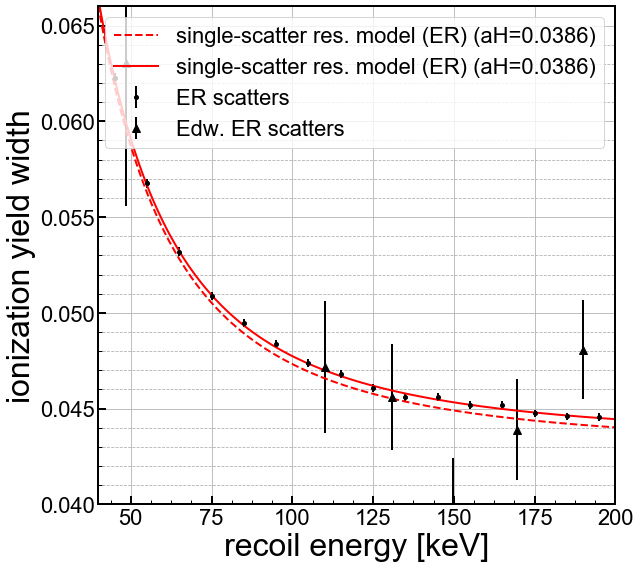

In [8]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

mask = [True, True, False, False, True, True, True, True, True]



X=np.arange(0.1,200,0.1)


ax1.plot(X,sigQerv(X),color='r',linestyle="--",linewidth=2, \
         label='single-scatter res. model (ER) (aH={})'.format(aH))
ax1.plot(E,sig,color='r',linestyle="-",linewidth=2, \
         label='single-scatter res. model (ER) (aH={})'.format(aH))
ax1.errorbar(xE,qbootsigs, yerr=(qbootsigerrsl,qbootsigerrsu), \
             color='k', marker='o',markersize=4,linestyle='none',label='ER scatters', linewidth=2)
ax1.errorbar(E_recoil_ER[mask],sig_ER[mask], yerr=sig_ER_err[mask], \
             color='k', marker='^',markersize=8,linestyle='none',label='Edw. ER scatters', linewidth=2)




ymin = 0.04
ymax = 0.066



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(40, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/ER_match.png')
plt.show()

In [9]:
#do this for NR singles as well
import observable_simulations as osim
import histogram_yield as hy

Q,Ernr,Q_ss,Ernr_ss = osim.simQEr('GGA3',V=V,aH=aH,C=C,highstats=True)
bindf,bindfE = hy.QEr_Ebin(Q_ss, Ernr_ss, bins=bins,silent=True)
qbootsigs_nr,qbootsigerrsl_nr,qbootsigerrsu_nr = hy.QEr_Qboot(bindf,bins,silent=True)
qbootcorrs_nr = hy.QEr_QbootBC(bindfE,qbootsigs_nr,xE,20,bins,silent=True)

print(qbootsigs_nr)
print(qbootsigerrsl_nr)
print(qbootsigerrsu_nr)
print(qbootcorrs_nr)

[4.73601974e+01 8.87205673e-02 5.24791419e-02 3.80916366e-02
 3.09306291e-02 2.61449821e-02 2.30310966e-02 2.04054760e-02
 1.93494976e-02 1.90915372e-02 1.64484205e-02 1.67565713e-02
 1.65463355e-02 1.82540323e-02 1.57574368e-02 1.47958687e-02
 1.66243149e-02 1.49068991e-02 1.63757041e-02 1.60136684e-02]
[2.24143682e+01 1.25666996e-03 1.00713482e-03 9.06681324e-04
 9.12269360e-04 9.07648076e-04 9.57396095e-04 9.04794994e-04
 9.79107036e-04 1.07035019e-03 1.20095426e-03 1.27231701e-03
 1.56836868e-03 1.68547741e-03 2.16433702e-03 1.65573251e-03
 2.24774816e-03 2.75458006e-03 2.16259511e-03 2.77286809e-03]
[3.01129522e+01 1.26785550e-03 1.02577463e-03 9.15854244e-04
 9.33175552e-04 9.22043836e-04 1.00009192e-03 9.34396601e-04
 1.02190545e-03 1.11024567e-03 1.19741603e-03 1.34537373e-03
 1.73313134e-03 1.83226583e-03 2.26897862e-03 1.84759656e-03
 2.47557316e-03 2.98587833e-03 2.72715020e-03 3.66933596e-03]
[2.47648623e+02 1.42090436e-01 9.62137778e-01 9.79702236e-01
 9.86013475e-01 9.883

In [10]:
#save the results for the simulated data
path='{}/'.format('NRss')

filename = 'data/sims.h5'


#remove vars
f = h5py.File(filename,'a')
exbins = path+'bins' in f
exxE = path+'xE' in f
exQ = path+'Q' in f
exEr = path+'Er' in f
exqbootsigs = path+'qbootsigs' in f
exqbootsigerrsu = path+'qbootsigerrsu' in f
exqbootsigerrsl = path+'qbootsigerrsl' in f
exqbootcorrs = path+'qbootcorrs' in f

if exbins:
  del f[path+'bins']
if exxE:
  del f[path+'xE']
if exQ:
  del f[path+'Q']
if exEr:
  del f[path+'Er']
if exqbootsigs:
  del f[path+'qbootsigs']
if exqbootsigerrsu:
  del f[path+'qbootsigerrsu']
if exqbootsigerrsl:
  del f[path+'qbootsigerrsl']
if exqbootcorrs:
  del f[path+'qbootcorrs']


dset = f.create_dataset(path+'bins',np.shape(bins),dtype=np.dtype('float64').type, \
compression="gzip",compression_opts=9)
dset[...] = bins
dset = f.create_dataset(path+'xE',np.shape(xE),dtype=np.dtype('float64').type)
dset[...] = xE
dset = f.create_dataset(path+'qbootsigs',np.shape(qbootsigs_nr),dtype=np.dtype('float64').type, \
compression="gzip",compression_opts=9)
dset[...] = qbootsigs_nr
dset = f.create_dataset(path+'qbootsigerrsu',np.shape(qbootsigerrsu_nr),dtype=np.dtype('float64').type, \
compression="gzip",compression_opts=9)
dset[...] = qbootsigerrsu_nr
dset = f.create_dataset(path+'qbootsigerrsl',np.shape(qbootsigerrsl_nr),dtype=np.dtype('float64').type, \
compression="gzip",compression_opts=9)
dset[...] = qbootsigerrsl_nr
dset = f.create_dataset(path+'qbootcorrs',np.shape(qbootcorrs_nr),dtype=np.dtype('float64').type, \
compression="gzip",compression_opts=9)
dset[...] = qbootcorrs_nr

f.close()

In [11]:
#get the NR calculations for our yield band
Enr,signr = fc.RWCalc(filename='data/res_calc.h5',band='NR',alpha=(1/18.0))

#Enr,signr = fc.RWCalc(filename='data/test.h5',band='NR')
print(np.shape(Enr))
print(signr[0])

GGA3/NR/4.0/5.556E-02/0.039/000/
True
(200,)
0.16120731279876183


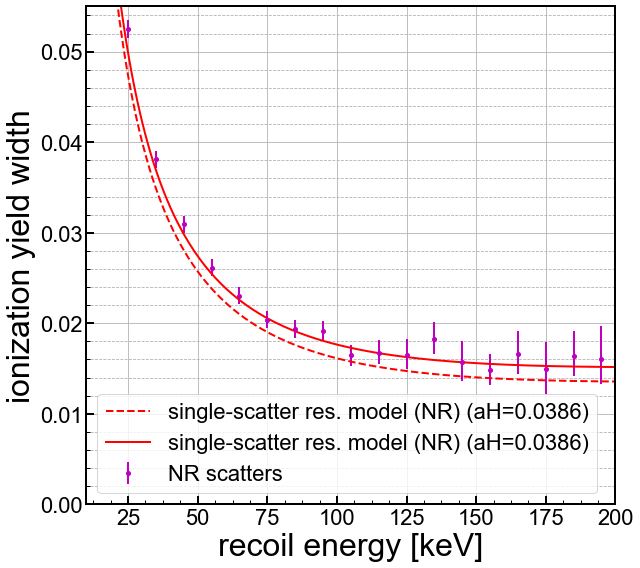

In [12]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes





X=np.arange(0.1,200,0.1)


ax1.plot(X,sigQnrv(X),color='r',linestyle="--",linewidth=2, \
         label='single-scatter res. model (NR) (aH={})'.format(aH))
ax1.plot(Enr,signr,color='r',linestyle="-",linewidth=2, \
         label='single-scatter res. model (NR) (aH={})'.format(aH))
ax1.errorbar(xE,qbootsigs_nr, yerr=(qbootsigerrsl_nr,qbootsigerrsu_nr), \
         color='m', marker='o', markersize=4,linestyle='none',label='NR scatters', linewidth=2)




ymin = 0.00
ymax = 0.055



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/NR_ss_match.png')
plt.show()

In [13]:
#make a multiples-scatter plot
bindf_ms,bindfE_ms = hy.QEr_Ebin(Q, Ernr, bins=bins,silent=True)
qbootsigs_nr_ms,qbootsigerrsl_nr_ms,qbootsigerrsu_nr_ms = hy.QEr_Qboot(bindf_ms,bins,silent=True)
qbootcorrs_nr_ms = hy.QEr_QbootBC(bindfE_ms,qbootsigs_nr_ms,xE,20,bins,silent=True)

In [14]:
#save the results for the simulated data
path='{}/'.format('NR')

filename = 'data/sims.h5'


#remove vars
f = h5py.File(filename,'a')
exbins = path+'bins' in f
exxE = path+'xE' in f
exQ = path+'Q' in f
exEr = path+'Er' in f
exqbootsigs = path+'qbootsigs' in f
exqbootsigerrsu = path+'qbootsigerrsu' in f
exqbootsigerrsl = path+'qbootsigerrsl' in f
exqbootcorrs = path+'qbootcorrs' in f

if exbins:
  del f[path+'bins']
if exxE:
  del f[path+'xE']
if exQ:
  del f[path+'Q']
if exEr:
  del f[path+'Er']
if exqbootsigs:
  del f[path+'qbootsigs']
if exqbootsigerrsu:
  del f[path+'qbootsigerrsu']
if exqbootsigerrsl:
  del f[path+'qbootsigerrsl']
if exqbootcorrs:
  del f[path+'qbootcorrs']


dset = f.create_dataset(path+'bins',np.shape(bins),dtype=np.dtype('float64').type, \
compression="gzip",compression_opts=9)
dset[...] = bins
dset = f.create_dataset(path+'xE',np.shape(xE),dtype=np.dtype('float64').type)
dset[...] = xE
dset = f.create_dataset(path+'qbootsigs',np.shape(qbootsigs_nr_ms),dtype=np.dtype('float64').type, \
compression="gzip",compression_opts=9)
dset[...] = qbootsigs_nr_ms
dset = f.create_dataset(path+'qbootsigerrsu',np.shape(qbootsigerrsu_nr_ms),dtype=np.dtype('float64').type, \
compression="gzip",compression_opts=9)
dset[...] = qbootsigerrsu_nr_ms
dset = f.create_dataset(path+'qbootsigerrsl',np.shape(qbootsigerrsl_nr_ms),dtype=np.dtype('float64').type, \
compression="gzip",compression_opts=9)
dset[...] = qbootsigerrsl_nr_ms
dset = f.create_dataset(path+'qbootcorrs',np.shape(qbootcorrs_nr_ms),dtype=np.dtype('float64').type, \
compression="gzip",compression_opts=9)
dset[...] = qbootcorrs_nr_ms

f.close()

In [15]:
#let's make a callable out of the predicted single-scatter resolution
import scipy.interpolate as inter

sigQnr_c = inter.InterpolatedUnivariateSpline(Enr, signr, k=3)
sigQnr_c_v = np.vectorize(sigQnr_c)
print(sigQnrv(150))
print(sigQnr_c_v(150))

0.014024865222086066
0.015590296261144181


In [16]:
#also construct a residual function for use with lmfit
import lmfit as lmf

def residual(params, x, data, eps_data,sigQfunc):
    Cms = params['Cms']
    m = params['m']


    model = np.sqrt(sigQfunc(x)**2 + (Cms+m*x)**2)

    return (data-model) / eps_data

def residual_const(params, x, data, eps_data,sigQfunc):
    Cms = params['Cms']


    model = np.sqrt(sigQfunc(x)**2 + (Cms)**2)

    return (data-model) / eps_data

#do it with lmfit
params = lmf.Parameters()
params.add('Cms', value=0.02)
lmfout = lmf.minimize(residual_const, params, args=(xE, qbootsigs_nr_ms, qbootsigerrsu_nr_ms,sigQnr_c_v))
#print(lmf.fit_report(lmfout))
print('lmfit result--multiples: constant C')
print(lmf.report_fit(lmfout.params))

Cms_const = lmfout.params['Cms'].value

params = lmf.Parameters()
params.add('Cms', value=0.02)
params.add('m', value=0)
lmfout = lmf.minimize(residual, params, args=(xE, qbootsigs_nr_ms, qbootsigerrsu_nr_ms,sigQnr_c_v))
#print(lmf.fit_report(lmfout))
print('lmfit result--multiples: linear C')
print(lmf.report_fit(lmfout.params))

Cms = lmfout.params['Cms'].value
slope = lmfout.params['m'].value

lmfit result--multiples: constant C
[[Variables]]
    Cms:  0.02437976 +/- 7.1881e-04 (2.95%) (init = 0.02)
None
lmfit result--multiples: linear C
[[Variables]]
    Cms:  0.02071745 +/- 0.00140014 (6.76%) (init = 0.02)
    m:    4.6413e-05 +/- 1.5630e-05 (33.68%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(Cms, m) = -0.899
None


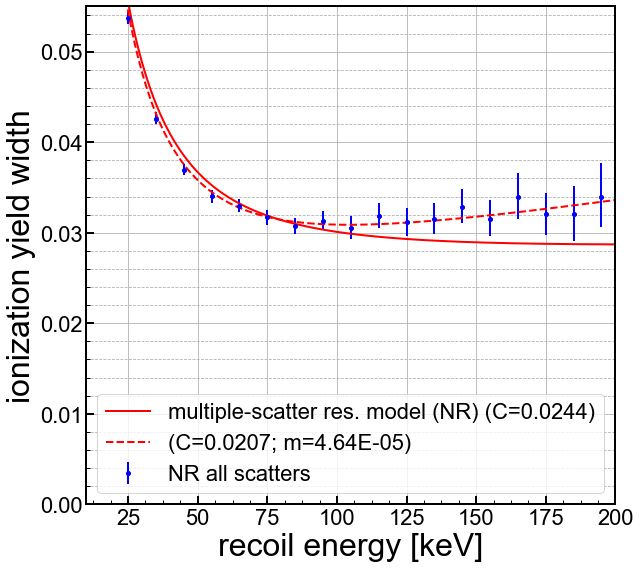

In [17]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes





X=np.arange(0.1,200,0.1)



ax1.plot(X,np.sqrt(sigQnr_c_v(X)**2+Cms_const**2),color='r',linestyle="-",linewidth=2, \
         label='multiple-scatter res. model (NR) (C={:01.3})'.format(Cms_const))
ax1.plot(X,np.sqrt(sigQnr_c_v(X)**2+(Cms+X*slope)**2),color='r',linestyle="--",linewidth=2, \
         label='(C={:01.3}; m={:01.2E})'.format(Cms,slope))
ax1.errorbar(xE,qbootsigs_nr_ms, yerr=(qbootsigerrsl_nr_ms,qbootsigerrsu_nr_ms), \
         color='b', marker='o', markersize=4,linestyle='none',label='NR all scatters', linewidth=2)




ymin = 0.00
ymax = 0.055



ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(10, 200) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]',**axis_font)
ax1.set_ylabel('ionization yield width',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/NR_ms_match.png')
plt.show()